# Projet :   Analyse de données <span style='color:Blue'> Twitter  </span> : Python pour la data-science 🐍🗃️

#### Auteurs : Ambroise Bouru, Juliette Veillon, Florent Le Clerc

Ce projet a été effectué dans le cadre de l'unité d'enseignement "Python pour la data-science" dispensé à l'ENSAE. Conformément aux attendus de cet enseignement, ce projet est divisé en trois parties : une partie "récupération et traitement des données", une partie "modélisation", ainsi qu'une partie "analyse descriptive et représentation graphique".

<br /><br />

## Problématique

Dans ce projet, nous tenterons de répondre à la problématique suivante : **Dans quelle mesure l'analyse de cluster de graphes permet-elle de mettre en évidence des caractéristiques propres à différents groupes d'utilisateurs de Twitter ?**

Afin de répondre à cette problématique, nous avons utilisé un jeu de données volontairement très spécifique, à savoir l'ensemble des utilisateurs français ayant tweeté sur le match 🇦🇷 - 🇭🇷 ayant eu lieu le mardi 13 décembre.

Le jeu de données obtenus, contenant environ 9000 tweets, nous a permis de réaliser une modélisation pertinente sans que cela ne pose de problème en termes de temps d'exécution.

<br />

## I. Récupération et traitement des données

La récupération des données s'est faite à l'aide de l'API 2.0 et de l'API 1.0 de Twitter. Ces deux API sont mises à disposition gratuitement par Twitter, mais l'API 1.0 demande une approbation de la part de Twitter. (https://developer.twitter.com/en/docs/api-reference-index).

La manipulation des requêtes de ces deux API s'est faite via le module "twitter" de Python, permettant de récupérer facilement les jeux de données directement sur Python.

Grâce à cette API, nous avons tout d'abord extrait les tweets et les utilisateurs ayant tweeté durant ce match, et exporté les résultats dans deux fichiers json distincts. En particulier, le fichier json des utilisateurs comporte l'intégralité des ids des personnes ayant tweeté durant ce match. 

Grâce à cela, dans un deuxième temps, pour chaque personne ayant tweeté, nous avons de nouveau utilisé l'API pour extraire tous les following de cette personne. Ces requêtes ont été ensuite sauvegardées sous la forme d'un dictionnaire, dans lequel les clés correspondent aux ids des personnes ayant tweetés durant le match, et les valeurs aux listes des ids des followings de chaque personne.


<br />

## II. Modélisation

Le dictionnaire créé dans la partie I nous a ensuite permis de construire le graphe des relations. En effet, nous avons considéré que le choix le plus pertinent pour que deux nœuds soient en relation - le graphe est non-orienté - est que l'une des deux personnes follow l'autre.

Une fois le graphe créé, nous avons réalisé le clustering de ce graphe à l'aide de trois algorithmes différents. Le clustering, comme étudié en cours, permet de créer des clusters d'observations, tels que les observations sont homogènes au sein de chaque cluster, et hétérogènes entre les différents clusters.

En revanche, les algorithmes de clustering ne s'appliquent pas au même type de jeux de données que ceux étudiés en cours. En effet, dans le cours, nous avons créé des clusters censés regrouper des groupes d'individus ayant des caractéristiques socio-économiques similaires. Ici, le problème est tout à fait différent. En effet, le seul critère pour créer des clusters sont les relations entre individus. Les personnes au sein de chaque cluster sont donc censées être des personnes qui se follow les unes les autres.

Ces trois algorithmes, présentés plus en détail dans le notebook correspondant, sont les algorithmes de Louvain, de clustering spectral et de propagation d'étiquettes. Ce sont les trois algorithmes implementés dans le module scikit-network, un package spécialisé dans l'étude des graphes. Les algorithmes de Louvain et de propagation d'étiquettes sont relativement différents des algorithmes étudiés en cours, dans la mesure où, contrairement à l'algorithme de clustering spectral, on ne peut pas spécifier le nombre de clusters souhaités. Ainsi, ces deux algorithmes renvoient tous deux environ 1000 clusters sur un jeu de données de 5600 utilisateurs.

<br />

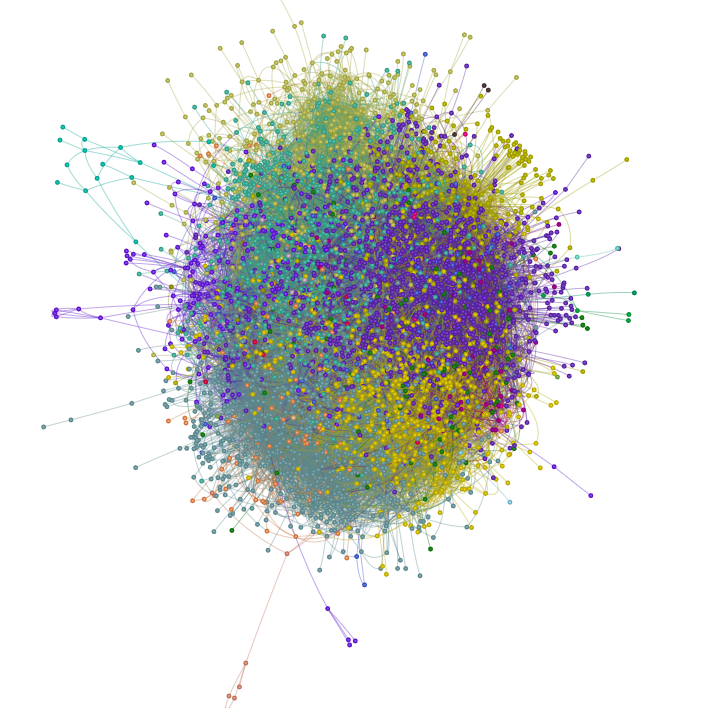

<h3><center> Représentation, à l'aide du module pyvis, du clustering obtenu via l'algorithme de Louvain </center></h3>

Finalement, nous avons décidé d'utiliser l'algorithme de clustering spectral. Tout d'abord, l'algorithme de clustering par propagation d'étiquettes ne nous donne pas des résultats satisfaisants. En effet, sur les 5642 utilisateurs, le cluster le plus gros comporte 4471 individus, et les trois suivants seulement 28, 20 et 7 individus. Il est tout simplement impossible de pouvoir faire de la modélisation sur des clusters avec de si petits effectifs.

Ensuite, les labels ressortis par l'algorithme de Louvain sont très prometteurs. En effet, les quatre clusters les plus gros sont assez équilibrés, car comportant 1215, 904, 638 et 563 individus précisément. À l'inverse, les clusters ressortis par l'algorithme de clustering spectral sont beaucoup moins équilibrés : 4376, 1123, et seulement 87 et 56 individus. À ce stade, il semblerait donc pertinent de choisir l'algorithme de Louvain. 

Néanmoins, les analyses faites sur les clusters obtenus par l'algorithme de Louvain ne nous ont pas permis d'inférer des caractéristiques propres à chacun de ces clusters. Comme rappelé ci-dessous, nous nous sommes surtout intéressés aux lemmes présents dans les tweets de chaque cluster. Or, les lemmes présents dans les différents clusters calculés par l'algorithme de Louvain sont assez analogues. Par exemple, parmi les dix lemmes les plus employés, neuf sont communs aux quatre clusters. De plus, les conjectures apportées sur le type d'individu de chaque cluster pour cet algorithme ne sont pas vraiment validées par l'étude des autres lemmes, ce qui n'est pas le cas pour l'algorithme de clustering spectral.

Ceci peut peut-être s'expliquer par le fait que dans l'algorithme de Louvain, on ne peut pas spécifier le nombre de clusters voulus. Ainsi, de nombreux clusters obtenus par cet algorithme ne contiennent qu'un individu, correspondant aux individus qui sont peu en relation avec les autres - c'est le cas de 971 individus. Les individus qui ne follow personne ou quasiment personne dans le groupe en entier sont donc exclus de l'analyse. Mais ces personnes sont intéressantes à analyser, puisque le fait qu'elles soient peu en relation avec les autres est justement un indicateur d'appartenance à un groupe.

<br />

## III. Analyse des données

Grâce au clustering effectué dans la partie précédente, nous avons pu étudier les similarités présentes dans chacun des clusters. Les caractéristiques que nous avons souhaitées étudier sont, dans un premier temps, le texte des tweets au sein de chaque cluster, puis, dans un second temps, les autres caractéristiques des tweets - likes, retweets...

L'étude du texte des tweets a d'abord nécessité un travail préalable de nettoyage et de lemmatisation. Comme indiqué dans le cours, la lemmatisation consiste à regrouper plusieurs mots proches autour d'une même forme canonique. Par exemple, "petit", "petite", "petits", "petites" sont associés au même lemme "petit".

Une fois les tweets lemmatisés, nous avons pu étudier les caractéristiques des tweets au sein de chaque cluster. En premier lieu, nous avons décidé de réaliser un histogramme des dix lemmes les plus fréquents dans chaque cluster, et à partir de ces quatre histogrammes, de dégager des caractéristiques propres à chaque cluster. Les caractéristiques en question concernent l'intérêt pour Messi, l'encouragement de l'équipe croate ou argentine, ainsi que les compétences en football. 

<br />

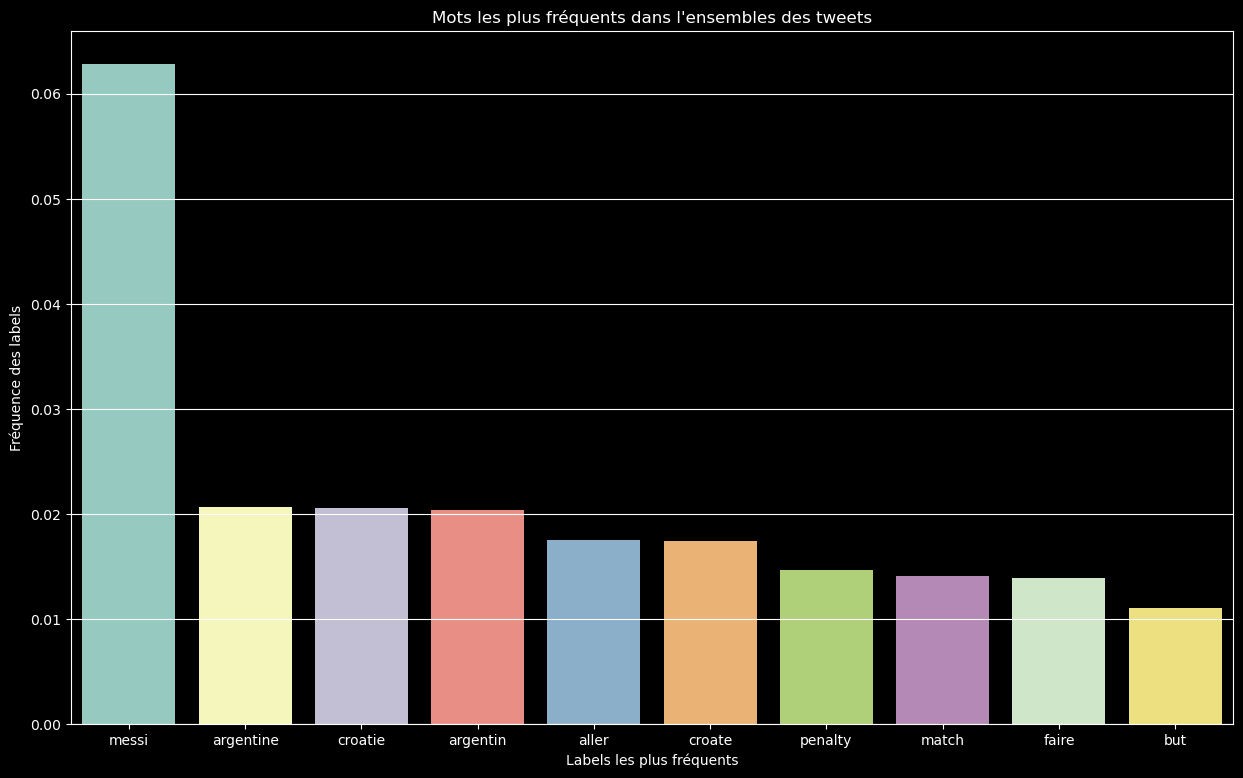

<h3><center> Graphique représentant les dix lemmes les plus fréquents pour l'intégralité des tweets </center></h3>

Ensuite, grâce à une représentation sous forme de nuages de mots - comme étudié en cours - nous avons tenté de vérifier si les tendances conjecturées à l'aide des graphiques semblent être valide ou non, en étudiant les autres lemmes moins employés. Cette représentation a en l'occurrence plutôt validé les conjectures réalisées. 

<br />

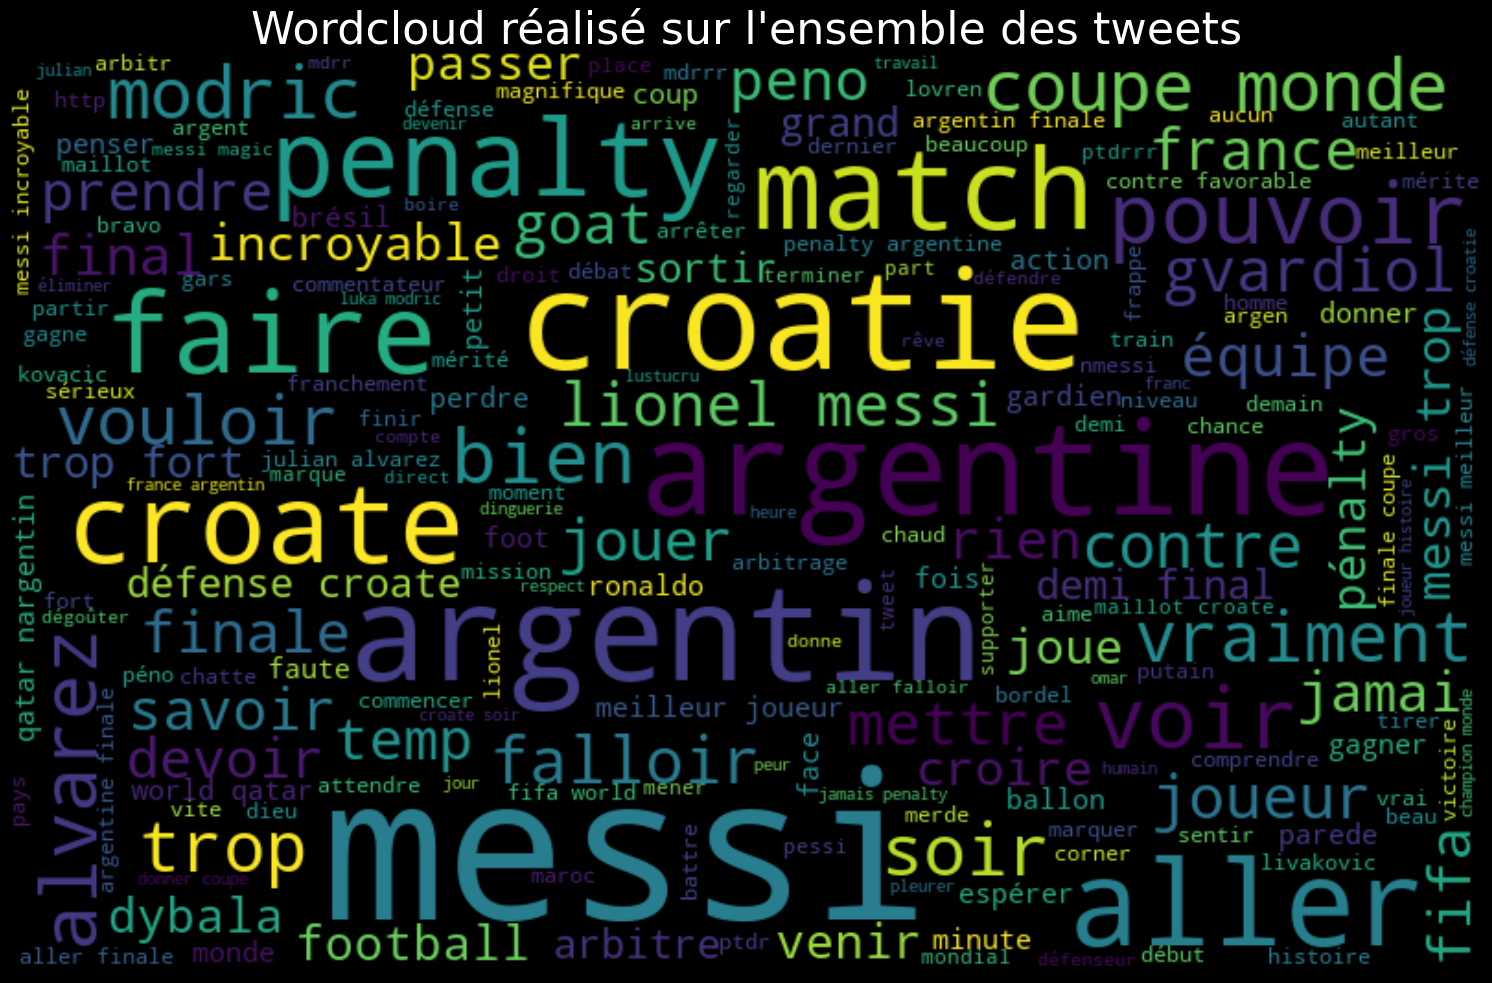

<h3><center> Représentation sous forme de nuages de mots de l'intégralité des tweets </center></h3>

<br />